In [2]:
import sys
# import from absolute directory
srcdir = '/Users/pengzhizhang/cellDancer/src'
sys.path.append(srcdir)

from turtle import color
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
from sampling import *
import pandas as pd
from colormap import *
import random
import os
import cdplt

In [3]:
load_cellDancer=pd.read_csv('/Users/pengzhizhang/pseudotime/data/Gastrulation/velocity_result/combined_detail_2000_genes_with_bin_and_smooth.csv')
load_cellDancer

,cellIndex,gene_name,s0,u0,s1,u1,alpha,beta,gamma,cost,clusters,cellID,embedding1,embedding2
0,0,2810025M15Rik,1.515440,0.000000,1.514860,0.000022,0.001560,0.022612,0.005908,0.087183,Blood progenitors 2,cell_363,3.460521,15.574629
1,1,2810025M15Rik,1.574459,0.000000,1.573860,0.000022,0.001522,0.022650,0.005876,0.087183,Blood progenitors 2,cell_382,2.490433,14.971734
2,2,2810025M15Rik,1.744201,0.000000,1.743548,0.000020,0.001426,0.022751,0.005787,0.087183,Blood progenitors 2,cell_385,2.351203,15.267069
3,3,2810025M15Rik,1.332406,0.000000,1.331888,0.000024,0.001682,0.022495,0.006009,0.087183,Blood progenitors 2,cell_393,5.899098,14.388825
4,4,2810025M15Rik,1.261786,0.000000,1.261292,0.000025,0.001732,0.022449,0.006049,0.087183,Blood progenitors 2,cell_398,4.823139,15.374831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24657995,12324,Zrsr2,0.255452,0.030816,0.323642,0.022484,0.005919,0.101278,0.144163,0.126370,Erythroid3,cell_139318,8.032358,7.603037
24657996,12325,Zrsr2,0.204272,0.049630,0.322781,0.036203,0.008434,0.100651,0.142879,0.126370,Erythroid3,cell_139321,10.352904,6.446736
24657997,12326,Zrsr2,0.230350,0.050146,0.349145,0.036532,0.008174,0.100769,0.143180,0.126370,Erythroid3,cell_139326,9.464873,7.261099
24657998,12327,Zrsr2,0.236227,0.052799,0.361591,0.038445,0.008380,0.100769,0.143180,0.126370,Erythroid3,cell_139327,9.990495,7.243880


In [6]:

import importlib
importlib.reload(sys.modules['get_embedding'])
from get_embedding import get_embedding

gene_choice=list(set(load_cellDancer.gene_name))
get_embedding(load_cellDancer=load_cellDancer,
              gene_list=gene_choice,
              mode="gene",
              n_neighbors=100,
              step=(60,60))

(2000, 12329)
(2000, 12329)


/Users/pengzhizhang/cellDancer/src/get_embedding.py:50: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


In [7]:
load_cellDancer

,cellIndex,gene_name,s0,u0,s1,u1,alpha,beta,gamma,cost,clusters,cellID,embedding1,embedding2,index,velocity1,velocity2
0,0,2810025M15Rik,1.515440,0.000000,1.514860,0.000022,0.001560,0.022612,0.005908,0.087183,Blood progenitors 2,cell_363,3.460521,15.574629,0,NaN,NaN
1,1,2810025M15Rik,1.574459,0.000000,1.573860,0.000022,0.001522,0.022650,0.005876,0.087183,Blood progenitors 2,cell_382,2.490433,14.971734,1,NaN,NaN
2,2,2810025M15Rik,1.744201,0.000000,1.743548,0.000020,0.001426,0.022751,0.005787,0.087183,Blood progenitors 2,cell_385,2.351203,15.267069,2,NaN,NaN
3,3,2810025M15Rik,1.332406,0.000000,1.331888,0.000024,0.001682,0.022495,0.006009,0.087183,Blood progenitors 2,cell_393,5.899098,14.388825,3,NaN,NaN
4,4,2810025M15Rik,1.261786,0.000000,1.261292,0.000025,0.001732,0.022449,0.006049,0.087183,Blood progenitors 2,cell_398,4.823139,15.374831,4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24657995,12324,Zrsr2,0.255452,0.030816,0.323642,0.022484,0.005919,0.101278,0.144163,0.126370,Erythroid3,cell_139318,8.032358,7.603037,12324,NaN,NaN
24657996,12325,Zrsr2,0.204272,0.049630,0.322781,0.036203,0.008434,0.100651,0.142879,0.126370,Erythroid3,cell_139321,10.352904,6.446736,12325,NaN,NaN
24657997,12326,Zrsr2,0.230350,0.050146,0.349145,0.036532,0.008174,0.100769,0.143180,0.126370,Erythroid3,cell_139326,9.464873,7.261099,12326,NaN,NaN
24657998,12327,Zrsr2,0.236227,0.052799,0.361591,0.038445,0.008380,0.100769,0.143180,0.126370,Erythroid3,cell_139327,9.990495,7.243880,12327,NaN,NaN


In [11]:
clusters = load_cellDancer['clusters'].drop_duplicates()

In [270]:
import os
import sys
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.pyplot import cm
from matplotlib.colors import ListedColormap

from scipy.stats import norm as normal
import bezier
import numpy as np
import pandas as pd
from colormap import *

def scatter_cell(
        ax,
        load_cellDancer, 
        save_path=None,
        x=None,
        y=None,
        custom_xlim=None,custom_ylim=None,
        colors=None, 
        alpha=0.5, s = 5,
        velocity=False,
        gene_name=None,
        #add_amt_gene=2000,
        #mode='embedding',
        min_mass=2,
        grid_steps=(30,30)): 


    """Cell velocity plot.
    TO DO: load_cellDancer contains the cluster information, needs improve
    
    .. image:: https://user-images.githubusercontent.com/31883718/67709134-a0989480-f9bd-11e9-8ae6-f6391f5d95a0.png
    

    Arguments
    ---------
    adata: :class:`~anndata.AnnData`
        Annotated data matrix.
    density: `float` (default: 1)
        Amount of velocities to show - 0 none to 1 all
    arrow_size: `float` or triple `headlength, headwidth, headaxislength` (default: 1)
        Size of arrows.
    arrow_length: `float` (default: 1)
        Length of arrows.
    scale: `float` (default: 1)
        Length of velocities in the embedding.
    {scatter}

    Returns
    -------
    `matplotlib.Axis` if `show==False`
    """

    #   colors can be one of those:
    #   a dictionary of {cluster:color}
    #   a string of the column attribute (pseudotime, alpha, beta etc)
    #   a list of clusters 
    #   None

    def gen_Line2D(label, markerfacecolor):
        return Line2D([0], [0], color='w', marker='o', label=label,
            markerfacecolor=markerfacecolor, 
            markeredgewidth=0,
            markersize=s)

    if isinstance(colors, list):
        #print("\nbuild a colormap for a list of clusters as input\n")
        colors = build_colormap(colors)
    if isinstance(colors, dict):
        attr = 'clusters'
        legend_elements= [gen_Line2D(i, colors[i]) for i in colors]
        c=np.vectorize(dicts.get)(extract_from_df(load_cellDancer, 'clusters', gene_name))
        cmap=ListedColormap(list(colors.keys()))
    elif isinstance(colors, str):
        attr = colors
        if colors in ['alpha', 'beta', 'gamma']:
            assert gene_name, '\nError! gene_name is required!\n'
            cmap = ListedColormap(zissou2)
        if colors in ['spliced', 'unspliced']:
            assert gene_name, '\nError! gene_name is required!\n'
            colors = {'spliced':'s0', 'unspliced':'u0'}[colors]
            cmap = ListedColormap(fireworks3)
        if colors in ['pseudotime']:
            cmap = 'viridis'
        c = extract_from_df(load_cellDancer, [colors], gene_name)
    elif colors is None:
        attr = 'basic'
        cmap = None
        c = 'Grey'
        
    
    embedding = extract_from_df(load_cellDancer, ['embedding1', 'embedding2'], gene_name)
    velocity_embedding= extract_from_df(load_cellDancer, ['velocity1', 'velocity2'], gene_name)
    n_cells = embedding.shape[0]
    sample_cells = load_cellDancer['velocity1'][:n_cells].isna()
    embedding_ds = embedding[~sample_cells]
    
    ax.scatter(embedding[:, 0],
                embedding[:, 1],
                c=c,
                cmap=cmap,
                s=s,
                alpha=alpha,
                edgecolor="none")

    if velocity:
        grid_curve(ax, embedding_ds, velocity_embedding, grid_steps, min_mass)

    if custom_xlim is not None:
        ax.set_xlim(custom_xlim[0], custom_xlim[1])
    if custom_ylim is not None:
        ax.set_ylim(custom_ylim[0], custom_ylim[1])
    
    if isinstance(colors, dict):
        lgd=ax.legend(handles=legend_elements, 
                bbox_to_anchor=(1.01, 1), 
                loc='upper left')
        bbox_extra_artists=(lgd,)
    else:
        bbox_extra_artists=None
    

    if save_path is not None:
        file_name_parts = ['embedding', attr, gene_name]
        if velocity:
            file_name_parts.insert(0, 'velocity')
        
        save_file_name = os.path.join(save_path, "_".join(file_name_parts)+'.pdf')
        
        print("saved the file as", save_file_name)
        plt.savefig(save_file_name, 
                bbox_inches='tight',
                bbox_extra_artists=bbox_extra_artists)
        
    return ax



# PENGZHI -> Move this to utilities
def find_neighbors(data, gridpoints_coordinates, n_neighbors, radius=1):
    nn = NearestNeighbors(n_neighbors=n_neighbors, radius=1, n_jobs=-1)
    nn.fit(data)
    dists, neighs = nn.kneighbors(gridpoints_coordinates)
    return(dists, neighs)

def extract_from_df(load_cellDancer, attr_list, gene_name):
    ''' 
    Extract a single copy of a list of columns from the load_cellDancer data frame
    Returns a numpy array.
    '''
    if gene_name is None:
        gene_name = load_cellDancer.gene_name[0]
    one_gene_idx = load_cellDancer.gene_name == gene_name
    data = load_cellDancer[one_gene_idx][attr_list].dropna()
    return data.to_numpy()

def build_colormap(cluster_list):
        from itertools import cycle
        color_list=grove2.copy()
        colors = dict(zip(cluster_list, cycle(color_list)) if len(cluster_list) > len(color_list) else zip(cycle(cluster_list), color_list))
        return colors


# Source - https://github.com/velocyto-team/velocyto.py/blob/0963dd2df0ac802c36404e0f434ba97f07edfe4b/velocyto/analysis.py
def grid_curve(ax, embedding_ds, velocity_embedding, grid_steps, min_mass):
# calculate_grid_arrows
    # kernel grid plot

    def calculate_two_end_grid(embedding_ds, velocity_embedding, smooth=None, steps=None, min_mass=None):
        # Prepare the grid
        grs = []
        for dim_i in range(embedding_ds.shape[1]):
            m, M = np.min(embedding_ds[:, dim_i])-0.2, np.max(embedding_ds[:, dim_i])-0.2
            m = m - 0.025 * np.abs(M - m)
            M = M + 0.025 * np.abs(M - m)
            gr = np.linspace(m, M, steps[dim_i])
            grs.append(gr)

        meshes_tuple = np.meshgrid(*grs)
        gridpoints_coordinates = np.vstack(
            [i.flat for i in meshes_tuple]).T

        n_neighbors = int(velocity_embedding.shape[0]/3)
        dists_head, neighs_head = find_neighbors(
            embedding_ds, gridpoints_coordinates, n_neighbors, radius=1)
        dists_tail, neighs_tail = find_neighbors(
            embedding_ds+velocity_embedding, gridpoints_coordinates, n_neighbors, radius=1)
        std = np.mean([(g[1] - g[0]) for g in grs])

        # isotropic gaussian kernel
        gaussian_w_head = normal.pdf(
            loc=0, scale=smooth * std, x=dists_head)
        total_p_mass_head = gaussian_w_head.sum(1)
        gaussian_w_tail = normal.pdf(
            loc=0, scale=smooth * std, x=dists_tail)
        total_p_mass_tail = gaussian_w_tail.sum(1)

        
        UZ_head = (velocity_embedding[neighs_head] * gaussian_w_head[:, :, None]).sum(
            1) / np.maximum(1, total_p_mass_head)[:, None]  # weighed average
        UZ_tail = (velocity_embedding[neighs_tail] * gaussian_w_tail[:, :, None]).sum(
            1) / np.maximum(1, total_p_mass_tail)[:, None]  # weighed average

        XY = gridpoints_coordinates

        dists_head2, neighs_head2 = find_neighbors(
            embedding_ds, XY+UZ_head, n_neighbors, radius=1)
        dists_tail2, neighs_tail2 = find_neighbors(
            embedding_ds, XY-UZ_tail, n_neighbors, radius=1)

        gaussian_w_head2 = normal.pdf(
            loc=0, scale=smooth * std, x=dists_head2)
        total_p_mass_head2 = gaussian_w_head2.sum(1)
        gaussian_w_tail2 = normal.pdf(
            loc=0, scale=smooth * std, x=dists_tail2)
        total_p_mass_tail2 = gaussian_w_tail2.sum(1)

        UZ_head2 = (velocity_embedding[neighs_head2] * gaussian_w_head2[:, :, None]).sum(
            1) / np.maximum(1, total_p_mass_head2)[:, None]  # weighed average
        UZ_tail2 = (velocity_embedding[neighs_tail2] * gaussian_w_tail2[:, :, None]).sum(
            1) / np.maximum(1, total_p_mass_tail2)[:, None]  # weighed average

        mass_filter = total_p_mass_head < min_mass

        # filter dots
        UZ_head_filtered = UZ_head[~mass_filter, :]
        UZ_tail_filtered = UZ_tail[~mass_filter, :]
        UZ_head2_filtered = UZ_head2[~mass_filter, :]
        UZ_tail2_filtered = UZ_tail2[~mass_filter, :]
        XY_filtered = XY[~mass_filter, :]
        return(XY_filtered, UZ_head_filtered, UZ_tail_filtered, UZ_head2_filtered, UZ_tail2_filtered, mass_filter, grs)

    XY_filtered, UZ_head_filtered, UZ_tail_filtered, UZ_head2_filtered, UZ_tail2_filtered, mass_filter, grs = calculate_two_end_grid(
        embedding_ds, velocity_embedding, smooth=0.8, steps=grid_steps, min_mass=min_mass)

    #######################################################
    ############ connect two end grid to curve ############
    #######################################################
    n_curves = XY_filtered.shape[0]
    s_vals = np.linspace(0.0, 1.5, 15) # TODO check last
    ############ get longest distance len and norm ratio ############
    XYM = XY_filtered
    UVT = UZ_tail_filtered
    UVH = UZ_head_filtered
    UVT2 = UZ_tail2_filtered
    UVH2 = UZ_head2_filtered

    def norm_arrow_display_ratio(XYM, UVT, UVH, UVT2, UVH2, grs, s_vals):
        '''get the longest distance in prediction between the five points,
        and normalize by using the distance between two grids'''

        def distance(x, y):
            # calc disctnce list between a set of coordinate
            calculate_square = np.subtract(
                x[0:-1], x[1:])**2 + np.subtract(y[0:-1], y[1:])**2
            distance_result = (calculate_square)**0.5
            return distance_result

        max_discance = 0
        for i in range(n_curves):
            nodes = np.asfortranarray([[XYM[i, 0]-UVT[i, 0]-UVT2[i, 0], XYM[i, 0]-UVT[i, 0], XYM[i, 0], XYM[i, 0]+UVH[i, 0], XYM[i, 0]+UVH[i, 0]+UVH2[i, 0]],
                                        [XYM[i, 1]-UVT[i, 1]-UVT2[i, 1], XYM[i, 1]-UVT[i, 1], XYM[i, 1], XYM[i, 1]+UVH[i, 1], XYM[i, 1]+UVH[i, 1]+UVH2[i, 1]]])
            curve = bezier.Curve(nodes, degree=4)
            curve_dots = curve.evaluate_multi(s_vals)
            distance_sum = np.sum(
                distance(curve_dots[0], curve_dots[1]))
            max_discance = max(max_discance, distance_sum)
        distance_grid = (
            abs(grs[0][0]-grs[0][1]) + abs(grs[1][0]-grs[1][1]))/2
        norm_ratio = distance_grid/max_discance
        return(norm_ratio)

    norm_ratio = norm_arrow_display_ratio(
        XYM, UVT, UVH, UVT2, UVH2, grs, s_vals)
    ############ end --- get longest distance len and norm ratio ############

    ############ plot the curve arrow for cell velocity ############

    XYM = XY_filtered
    UVT = UZ_tail_filtered * norm_ratio
    UVH = UZ_head_filtered * norm_ratio
    UVT2 = UZ_tail2_filtered * norm_ratio
    UVH2 = UZ_head2_filtered * norm_ratio

    def plot_cell_velocity_curve(XYM, UVT, UVH, UVT2, UVH2, s_vals):
        #plt.axis('equal')
        # TO DO: add 'colorful cell velocity' to here, now there is only curve arrows
        for i in range(n_curves):
            nodes = np.asfortranarray([[XYM[i, 0]-UVT[i, 0]-UVT2[i, 0], XYM[i, 0]-UVT[i, 0], XYM[i, 0], XYM[i, 0]+UVH[i, 0], XYM[i, 0]+UVH[i, 0]+UVH2[i, 0]],
                                        [XYM[i, 1]-UVT[i, 1]-UVT2[i, 1], XYM[i, 1]-UVT[i, 1], XYM[i, 1], XYM[i, 1]+UVH[i, 1], XYM[i, 1]+UVH[i, 1]+UVH2[i, 1]]])
            curve = bezier.Curve(nodes, degree=4)
            curve_dots = curve.evaluate_multi(s_vals)
            plt.plot(curve_dots[0], curve_dots[1],
                        linewidth=0.5, color='black', alpha=1)

            # normalize the arrow of the last two points at the tail, to let all arrows has the same size in quiver
            U = curve_dots[0][-1]-curve_dots[0][-2]
            V = curve_dots[1][-1]-curve_dots[1][-2]
            N = np.sqrt(U**2 + V**2)
            U1, V1 = U/N*0.5, V/N*0.5  # 0.5 is to let the arrow have a suitable size
            ax.quiver(curve_dots[0][-2], curve_dots[1][-2], U1, V1, units='xy', angles='xy',
                        scale=1, linewidth=0, color='black', alpha=1, minlength=0, width=0.1)

    plot_cell_velocity_curve(XYM, UVT, UVH, UVT2, UVH2, s_vals)
    ############ end --- plot the curve arrow for cell velocity ############

    


build a colormap for a list of clusters as input



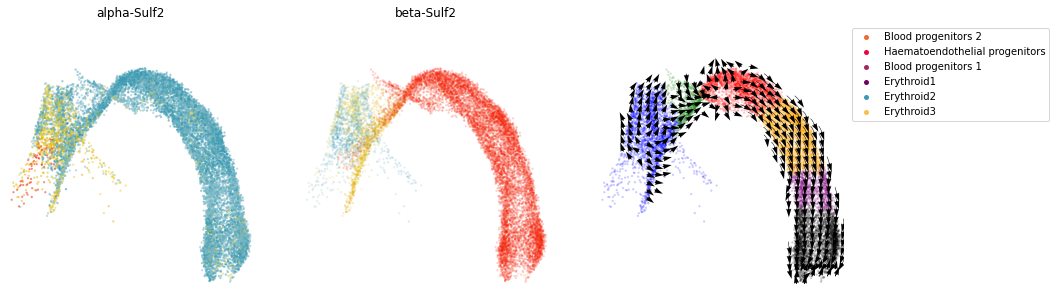

In [284]:
fig, ax = plt.subplots(ncols=3, figsize=(15,5))
scatter_cell(ax[0],load_cellDancer, colors='alpha', 
             gene_name='Sulf2', velocity=False, custom_xlim=(-5,11), custom_ylim=(4,18))
scatter_cell(ax[1],load_cellDancer, colors='beta', 
             gene_name='Sulf2', velocity=False, alpha=0.2, custom_xlim=(-5,11), custom_ylim=(4,18))
scatter_cell(ax[2],load_cellDancer, colors=clusters, 
             gene_name='Sulf2', velocity=True, alpha=0.2, custom_xlim=(-5,11), custom_ylim=(4,18))
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
ax[0].set_title('alpha-Sulf2')
ax[1].set_title('beta-Sulf2')
plt.show()